In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline,make_pipeline
from matplotlib.pyplot import figure
from sklearn.compose import ColumnTransformer
import numpy
import seaborn as sb

In [2]:
df_train = pd.read_csv("raw_data/train.csv")

In [3]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_train = df_train.drop(columns= ["Name", "Cabin"])
df_train["amenities"] = df_train['RoomService']+ df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,amenities
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4637.0


In [5]:
df_train = df_train.dropna()

In [6]:
df_train.nunique()

PassengerId     6923
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1128
FoodCourt       1346
ShoppingMall    1008
Spa             1180
VRDeck          1138
Transported        2
amenities       1986
dtype: int64

In [7]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'amenities'],
      dtype='object')

In [8]:
categorical_features = ["HomePlanet","CryoSleep","Destination","VIP"]
numerical_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa","VRDeck", "amenities"]

In [9]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(df_train[categorical_features])
df_train[encoder.get_feature_names()] = encoder.transform(df_train[categorical_features])

/home/agolovin/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [10]:
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x3_False,x3_True
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [11]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'amenities', 'x0_Earth', 'x0_Europa', 'x0_Mars',
       'x1_False', 'x1_True', 'x2_55 Cancri e', 'x2_PSO J318.5-22',
       'x2_TRAPPIST-1e', 'x3_False', 'x3_True'],
      dtype='object')

In [12]:
scaler = Normalizer()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

/home/agolovin/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [13]:
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x3_False,x3_True
0,0001_01,Europa,False,TRAPPIST-1e,1.000000,False,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,0.025907,False,0.117661,0.009715,0.026987,0.592624,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0003_01,Europa,False,TRAPPIST-1e,0.004506,True,0.003341,0.277808,0.000000,0.521667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0003_02,Europa,False,TRAPPIST-1e,0.005238,False,0.000000,0.203637,0.058885,0.528378,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0004_01,Earth,False,TRAPPIST-1e,0.012535,False,0.237381,0.054840,0.118299,0.442640,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,0.003711,True,0.000000,0.617190,0.000000,0.148708,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8689,9278_01,Earth,True,PSO J318.5-22,1.000000,False,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,0.009818,False,0.000000,0.000000,0.706884,0.000378,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8691,9280_01,Europa,False,55 Cancri e,0.005554,False,0.000000,0.182076,0.000000,0.061270,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
df_train["Transported"] = df_train["Transported"].astype(int)

/tmp/ipykernel_9547/611078182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Transported"] = df_train["Transported"].astype(int)


In [15]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'amenities', 'x0_Earth', 'x0_Europa', 'x0_Mars',
       'x1_False', 'x1_True', 'x2_55 Cancri e', 'x2_PSO J318.5-22',
       'x2_TRAPPIST-1e', 'x3_False', 'x3_True'],
      dtype='object')

In [16]:
X = df_train.drop(columns=["PassengerId", "HomePlanet","CryoSleep", "Destination","VIP","Transported", "amenities"])

In [17]:
X = X.rename(columns={'x1_False':'sleep_False', 'x1_True': 'sleep_True', 'x3_False': 'vip_False', 'x3_True': 'vip_True' })
y = df_train['Transported']

<AxesSubplot:>

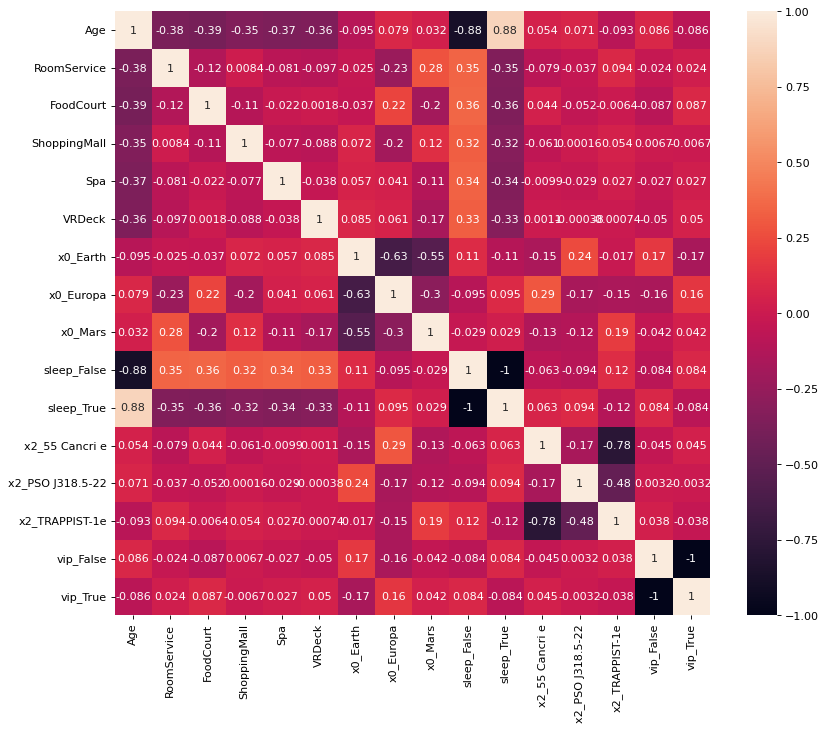

In [18]:
figure(figsize=(12, 10), dpi=80)
sb.heatmap(X.corr(), annot = True)

In [23]:
model = LogisticRegression()
cv = cross_validate(model, X,y, cv = 5, scoring = 'accuracy')

In [34]:
cv["test_score"].mean()

0.7983552096158261